## Exploratory analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import os

In [6]:
home_path = '/home/usuario/'

datasets_path = os.path.join(home_path, 'project_data', 'datasets')

all_datasets = ['SynthCars', 'SynthCarsPersons', 'Synth20', 'Synth20others', 'KITTITrackletsCars', 'KITTITrackletsCarsPersons', 'KITTITrackletsCarsHard', 'KITTITrackletsCarsPersonsHard']

For each dataset get basic information

In [7]:
dataset_path = os.path.join(datasets_path, all_datasets[1]) 

**Number of points**

Load each pointcloud in a list to compute individual statistics

In [ ]:
container = list()
for i in range(10000):
    file_path = os.path.join(dataset_path, "pointcloud1", str(i).zfill(8)+'.npy')
    file_arr = np.load(file_path)
    container.append(file_arr)

In [16]:
shapes = np.zeros((1, len(container)))
for i in range(len(container)): #Only interested in the number of points 
    shapes[0, i] = container[i].shape[0]

In [74]:
# Realize that it is a skewed distribution as mean!=median
print(f"Median: {np.median(shapes):.2f} \nMean: {shapes.mean():.2f} \nStd: {shapes.std():.2f}")

Median: 103.00 
Mean: 1343.72 
Std: 6328.21


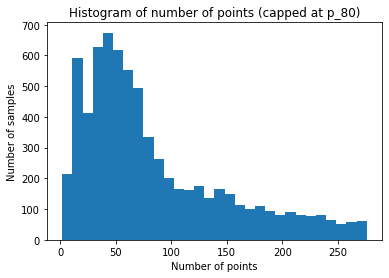

In [75]:
# Print histogram
shapes_sorted = sorted(shapes[0,:])
p_80 = shapes_sorted[7000]

plt.hist(shapes[shapes < p_80], bins=30)
plt.xlabel('Number of points')
plt.ylabel('Number of samples')
plt.title('Histogram of number of points (capped at p_80)')
plt.show()

**Distribution of points**

Load all the points in a single array (Nx3) so we can compute statistics

In [8]:
# It uses two different arrays so vstack runs more efficiently. As it copies the current array to
# a new one it takes longer to complete as we add more elements to the array.
point_container = np.zeros((1,3), dtype=int)
temp = np.zeros((1,3), dtype=int)

for i in range(10000):
    # Every 1000 iterations we empty the temp array and create new instance
    if i%1000 == 0:
        print(f"Iter: {i}; New temporal array")
        point_container = np.vstack((point_container, temp))
        temp = np.zeros((1,3), dtype=int)
    # Load pc
    file_path = os.path.join(dataset_path, "pointcloud1", str(i).zfill(8)+'.npy')
    raw_pc = np.load(file_path)
    # Demean pc and stack to temporal array
    pc = raw_pc - np.mean(raw_pc, axis=0)
    temp = np.vstack((temp, pc))

# Final stack of the last temporal contents
point_container = np.vstack((point_container, temp))

New temporal array; Iter: 0
New temporal array; Iter: 1000
New temporal array; Iter: 2000
New temporal array; Iter: 3000
New temporal array; Iter: 4000
New temporal array; Iter: 5000
New temporal array; Iter: 6000
New temporal array; Iter: 7000
New temporal array; Iter: 8000
New temporal array; Iter: 9000


In [25]:
stds = np.std(point_container, axis=0)
print(f"X axis STD: {stds[0]} \nY axis STD: {stds[1]} \nZ axis STD: {stds[2]} \n")

X axis STD: 0.5893414424209404 
Y axis STD: 0.5599442638334807 
Z axis STD: 0.2550654766847423 



[]

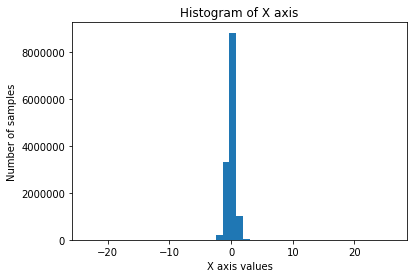

In [20]:
plt.hist(point_container[:,0], bins=45)
plt.xlabel('X axis values')
plt.ylabel('Number of samples')
plt.title('Histogram of X axis')
plt.plot()

[]

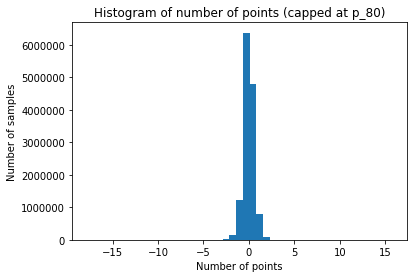

In [16]:
plt.hist(point_container[:,1], bins=45)
plt.xlabel('Y axis values')
plt.ylabel('Number of samples')
plt.title('Histogram of Y axis')
plt.plot()

[]

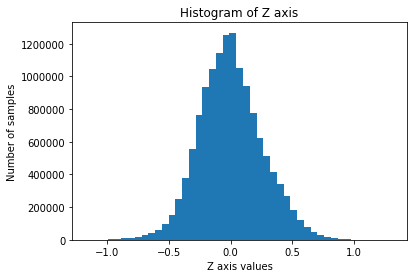

In [19]:
plt.hist(point_container[:,2], bins=45)
plt.xlabel('Z axis values')
plt.ylabel('Number of samples')
plt.title('Histogram of Z axis')
plt.plot()

**Metainformation**

Analysis of the meta-information

In [57]:
def to_arr(value):
    """ Converts a string with float values to an actual list of floats """
    return [float(name) for name in value.split()]

def fix_meta(meta):
    """ Converts all the string coded values to lists """
    meta['start_position'] = to_arr(meta['start_position'])
    meta['end_position'] = to_arr(meta['end_position'])
    meta['translation'] = to_arr(meta['translation'])

In [61]:
# Loads all jsons and stores them in a list(container)
container = list()
for i in range(10000):
    # Create path and load file
    file_path = os.path.join(dataset_path, "meta", str(i).zfill(8)+'.json')
    with open(file_path) as json_file: meta_dict = json.load(json_file)
    # Convert the string to lists
    fix_meta(meta_dict)
    # Append to file
    container.append(meta_dict)

Example corrected dict:

In [71]:
container[0]

{'start_position': [-34.41176893828633, 52.96470770224377, 0.0],
 'start_angle': 1.6651995446512524,
 'end_position': [-34.38575610867945, 53.05495053017164, 0.0],
 'end_angle': 0.6385864089522224,
 'translation': [0.0260128296068754, 0.09024282792786918, 0.0],
 'rel_angle': -1.02661313569903,
 'version': 0.1,
 'seed': 783495435,
 'mesh_id': 39,
 'mesh_scale': 2.9035093039132565,
 'cat': 'car'}

Analysis of the translations:

In [78]:
translations = np.zeros((len(container),2))
for i,info in enumerate(container):
    translations[i,:] = info['translation'][:2]

In [93]:
stds = np.std(translations, axis=0)
print(f"X axis translation STD: {stds[0]} \nY axis STD translation: {stds[1]}")

X axis translation STD: 0.4070773478618674 
Y axis STD translation: 0.41024757500291864


[]

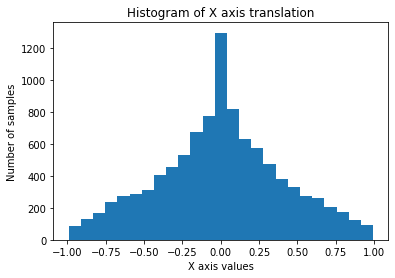

In [89]:
plt.hist(translations[:,0], bins=25)
plt.xlabel('X axis values')
plt.ylabel('Number of samples')
plt.title('Histogram of X axis translation')
plt.plot()

[]

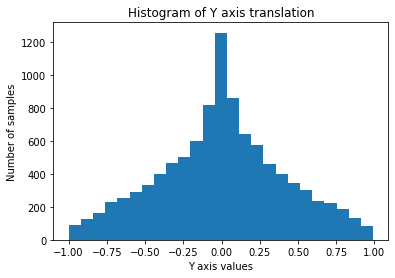

In [91]:
plt.hist(translations[:,1], bins=25)
plt.xlabel('Y axis values')
plt.ylabel('Number of samples')
plt.title('Histogram of Y axis translation')
plt.plot()

Analysis of angle rotation:

In [99]:
rotations = np.zeros((len(container),1))
for i,info in enumerate(container):
    rotations[i,0] = info['rel_angle']

In [106]:
print(f"Median: {np.median(rotations):.2f} \nMean: {rotations.mean():.2f} \nStd: {rotations.std():.2f}")

Median: 0.03 
Mean: 0.02 
Std: 0.91


[]

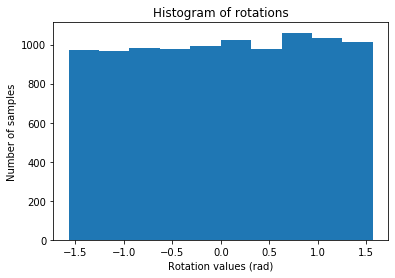

In [104]:
plt.hist(rotations)
plt.xlabel('Rotation values (rad)')
plt.ylabel('Number of samples')
plt.title('Histogram of rotations')
plt.plot()